<a href="https://colab.research.google.com/github/edinabwari/Thyroid_prediction_logistic_regeression/blob/main/Thyriod_logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Thyroid Prediction Using Logistic Regresion
- Problem Statement
  - In Kenya, the recurrence of thyroid disease presents a significant challenge in healthcare management. Predicting the likelihood of recurrence based on clinical features and patient demographics could lead to improved patient outcomes, tailored treatment plans, and better resource allocation.
 - The goal of this project is to develop a logistic regression model that can accurately predict the probability of thyroid disease recurrence in patients using clinical data such as hormone levels, nodule characteristics, and patient demographics (age, gender, family history, etc.).
 - The model will assist healthcare providers in identifying high-risk patients and guiding decision-making for preventive interventions and follow-up car.
- Objectives
 - develop a logistic regression model to predict the likelihood of recurrence of Thyroid
based on clinical features and patient demographics.

# Step one
- Data Exploration

In [ ]:
#Importing necessary libraries
import pandas as pd


In [ ]:
#Reading the dataset
df = pd.read_csv('Thyroid_Diff.csv')
df.head()

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No


In [ ]:
#Understanding the data
df.shape

(383, 17)

In [ ]:
#information about the columns number, data types and non null count
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Age                   383 non-null    int64 
 1   Gender                383 non-null    object
 2   Smoking               383 non-null    object
 3   Hx Smoking            383 non-null    object
 4   Hx Radiothreapy       383 non-null    object
 5   Thyroid Function      383 non-null    object
 6   Physical Examination  383 non-null    object
 7   Adenopathy            383 non-null    object
 8   Pathology             383 non-null    object
 9   Focality              383 non-null    object
 10  Risk                  383 non-null    object
 11  T                     383 non-null    object
 12  N                     383 non-null    object
 13  M                     383 non-null    object
 14  Stage                 383 non-null    object
 15  Response              383 non-null    ob

In [ ]:
df.columns

Index(['Age', 'Gender', 'Smoking', 'Hx Smoking', 'Hx Radiothreapy',
       'Thyroid Function', 'Physical Examination', 'Adenopathy', 'Pathology',
       'Focality', 'Risk', 'T', 'N', 'M', 'Stage', 'Response', 'Recurred'],
      dtype='object')

#### classifying variable in the datasett
  - numerical variables : 'Age.' {1column}
  - categorical variable : 'Gender', 'Smoking', 'Hx Smoking', 'Hx Radiothreapy',
       'Thyroid Function', 'Physical Examination', 'Adenopathy', 'Pathology',
       'Focality', 'Risk', 'T', 'N', 'M', 'Stage', 'Response', 'Recurred' {16 columns}



### Preprocessing steps on categorical variable

- Performing one hot encoding on the categorical variable that have 2 options i.e smoking and gender.
- For ordinal ordinal like 'T', 'N', 'M', and 'Stage' we use label encoding.

In [ ]:
#descriptive Statistics analysis on numerical columns
df.describe()

,Age
count,383.000000
mean,40.866841
std,15.134494
min,15.000000
25%,29.000000
50%,37.000000
75%,51.000000
max,82.000000


# Step Two.
- Data Visualization.

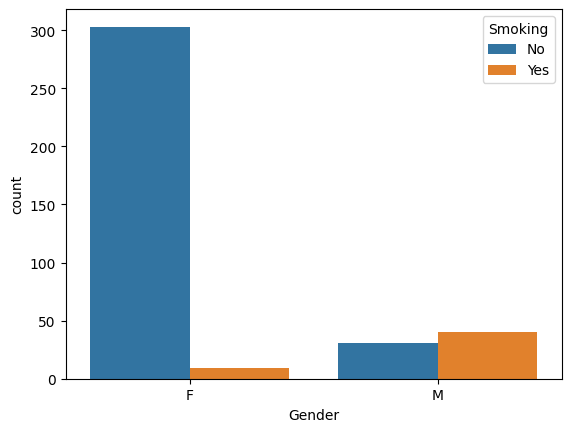

In [ ]:
#bar graph for  Smoking against Gender
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(x='Gender', hue='Smoking', data=df)
plt.show()


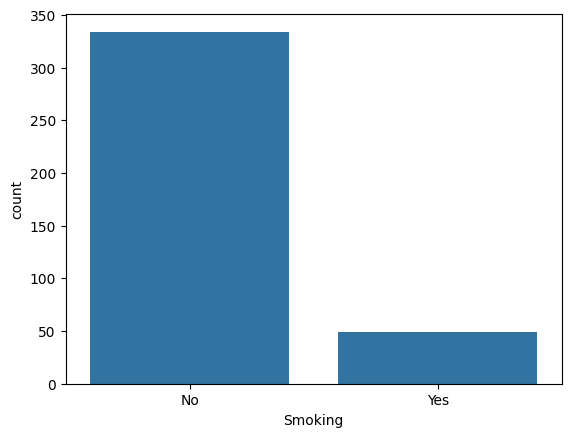

In [ ]:
sns.countplot(x='Smoking', data=df)
plt.show()

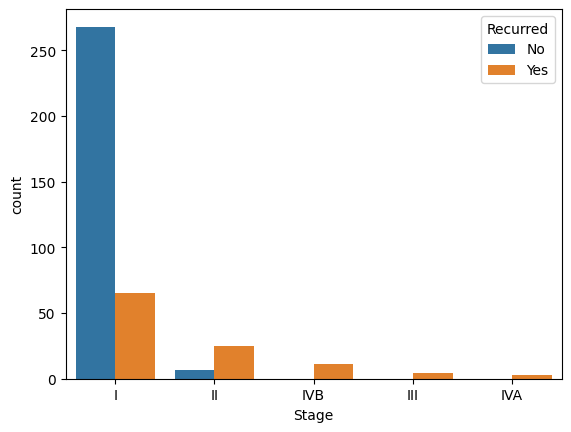

In [ ]:
sns.countplot(x='Stage', hue='Recurred', data=df)
plt.show()

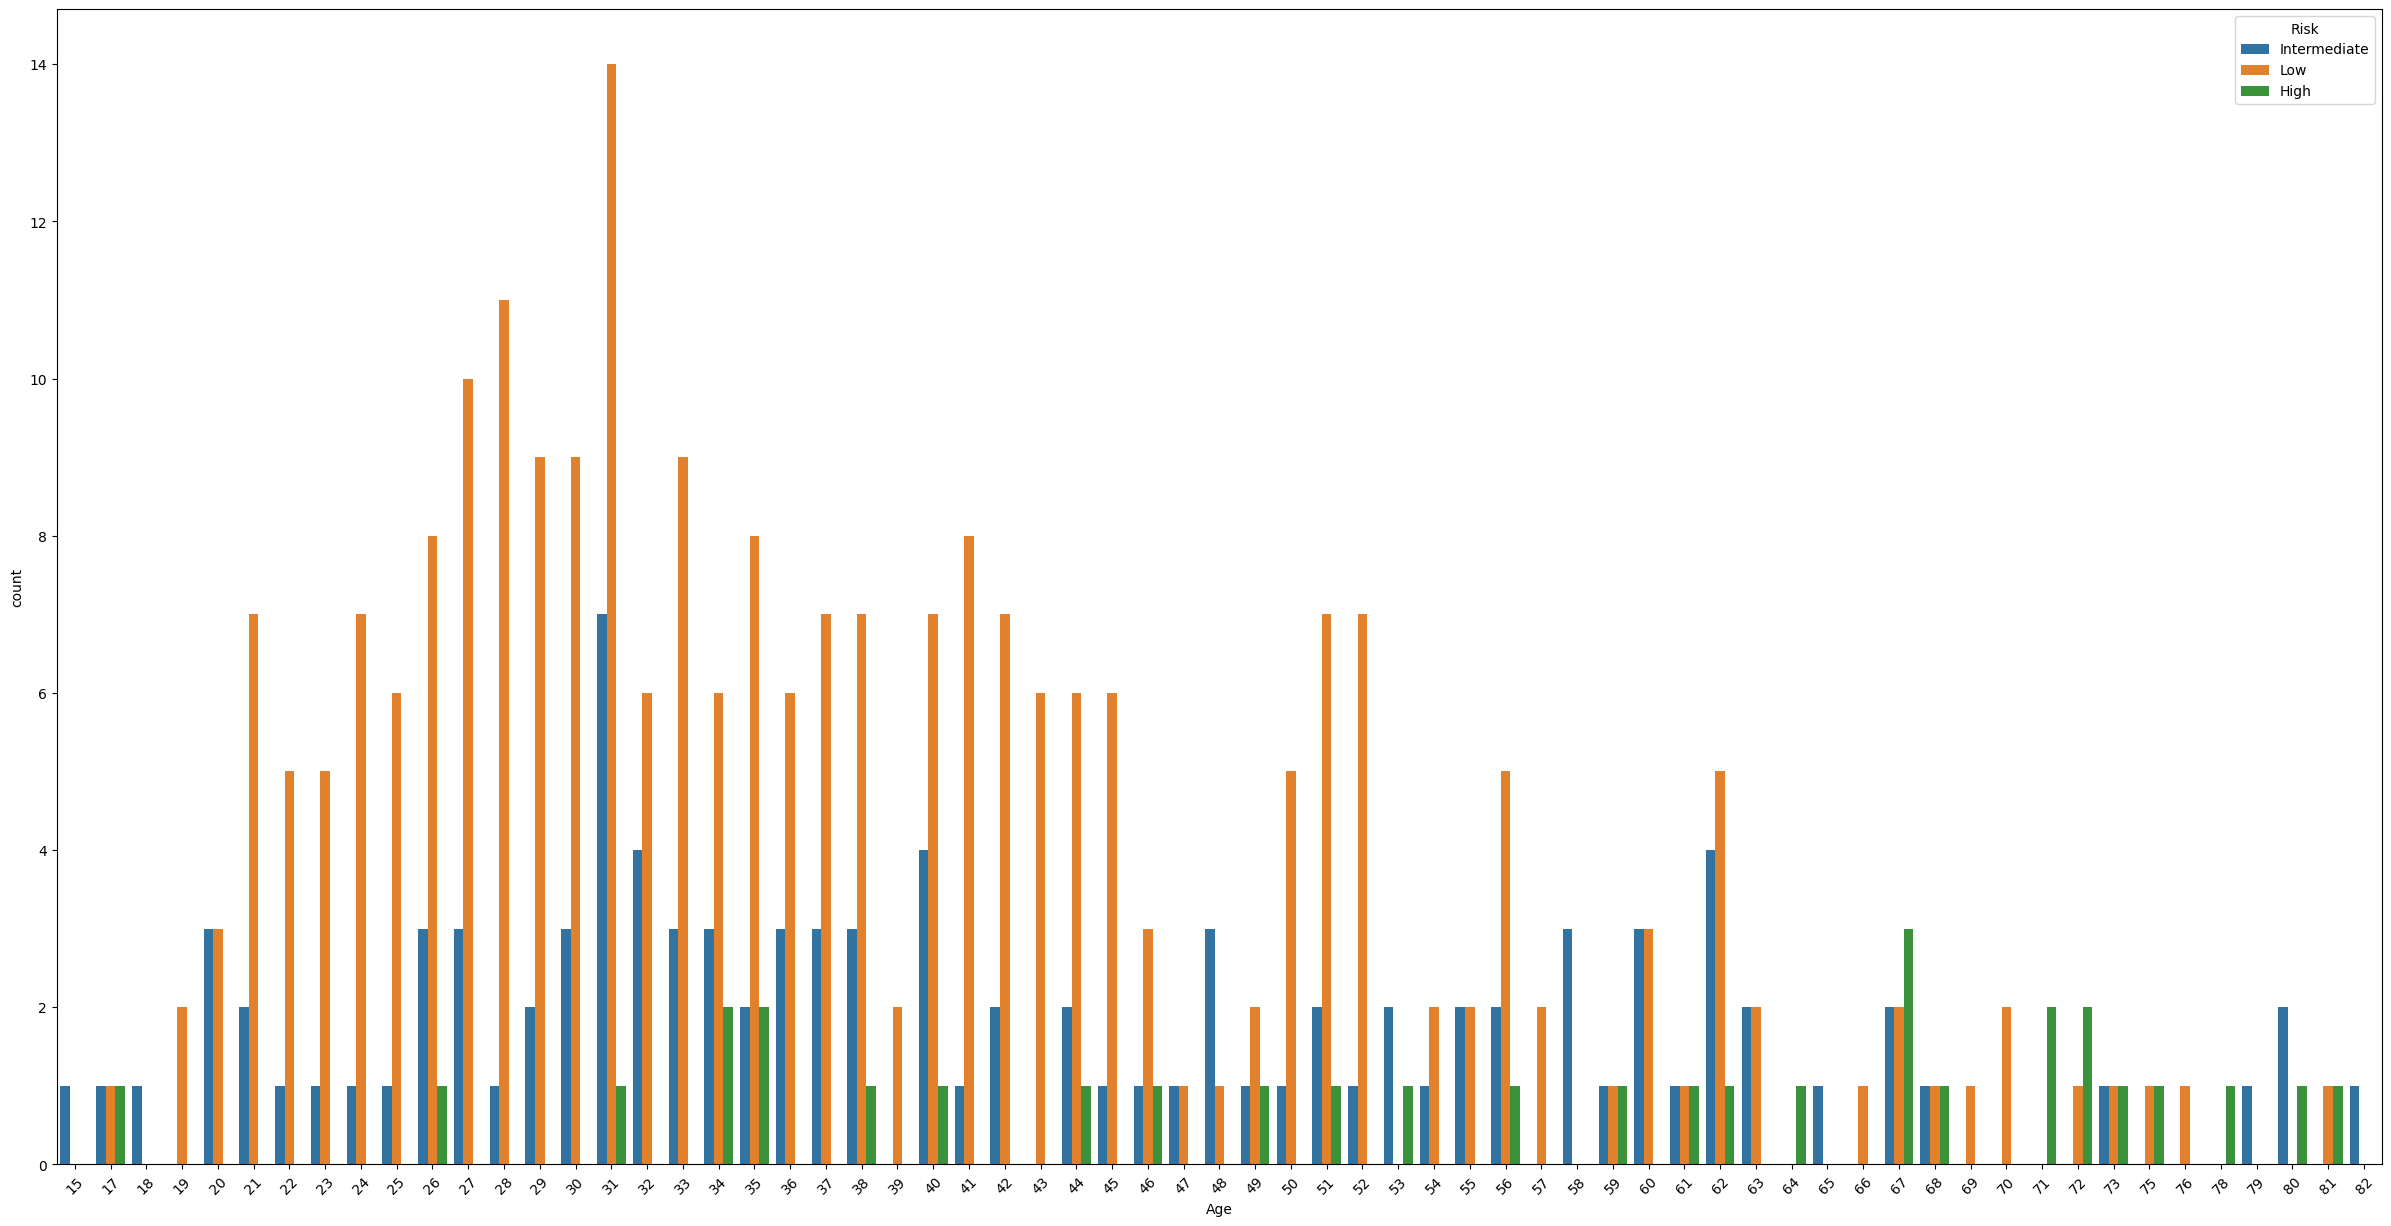

In [ ]:
#age and risk
plt.figure(figsize=(30,15))
sns.countplot(x='Age', hue='Risk', data=df)
#tilting the x axis valuues
plt.xticks(rotation=45)
#increasingg figure size

plt.show()

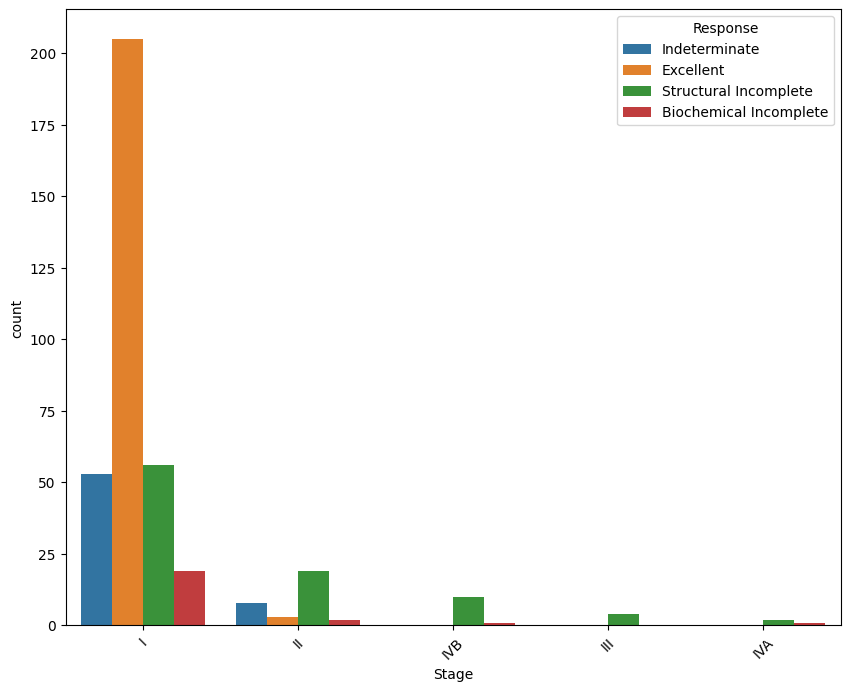

In [ ]:
#Stage and response
plt.figure(figsize=(10,8))
sns.countplot(x='Stage', hue='Response', data=df)
plt.xticks(rotation=45)
plt.show()

# Step Three.
  - Data Cleaning

In [ ]:
#Checking for missing values
df.isnull().sum()

Age                     0
Gender                  0
Smoking                 0
Hx Smoking              0
Hx Radiothreapy         0
Thyroid Function        0
Physical Examination    0
Adenopathy              0
Pathology               0
Focality                0
Risk                    0
T                       0
N                       0
M                       0
Stage                   0
Response                0
Recurred                0
dtype: int64

### Methods of handling missing values if found
  - dropna() function to drop rows that have empty values in columns
  - fillna(),interpolate() function to fill missing values with a value
  - leave as is method to ignore the missing values.
